In [11]:
import os
import pandas as pd

In [100]:
#read the path
file_path = "Sales_Data/"
#list all the files from the directory
file_list = [file for file in os.listdir(file_path)]
all_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(file_path+file)
    all_data = pd.concat([all_data,df])
all_data.to_csv("all_data",index=False)

In [101]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [102]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [103]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [104]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [105]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [124]:
sales_per_month = all_data.groupby('Month')[['Quantity Ordered','Price Each','Sales']].sum()
sales_per_month.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


In [127]:
id_max_sales = sales_per_month['Sales'].idxmax()

In [128]:
id_max_sales

12

Text(0, 0.5, 'Sales in USD')

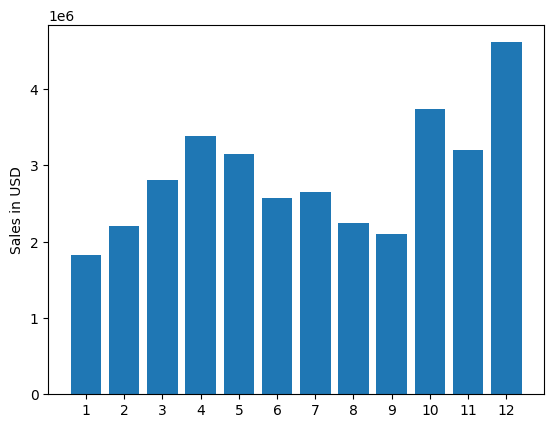

In [140]:
import matplotlib.pyplot as plt
months = range(1,13,1)
plt.bar(months, sales_per_month['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")

In [178]:
def getCity(address):
    city = address.split(',')[1].strip()
    state = address.split(',')[2].strip().split(' ')[0]
    return city+' ('+state+')'

all_data['City'] = all_data['Purchase Address'].apply(lambda x : getCity(x))
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [179]:
results_per_city = all_data.groupby('City')[['Sales']].sum()
results_per_city.head()

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80


In [221]:
city_with_the_most_sales = results_per_city['Sales'].idxmax()
city_with_the_most_sales

['Sales']

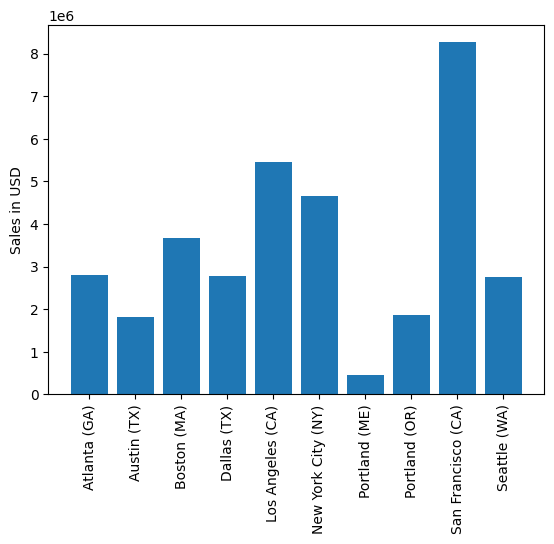

In [236]:
import matplotlib.pyplot as plt
plt.bar(cities,results_per_city['Sales'])
# cities = results_per_city.index.astype(str)
cities = [city for city, df in all_data.groupby('City')]
plt.xticks(cities,rotation="vertical")
plt.ylabel("Sales in USD")
plt.show()

In [238]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [239]:
all_data['Hour'] = all_data['Order Date'].dt.hour

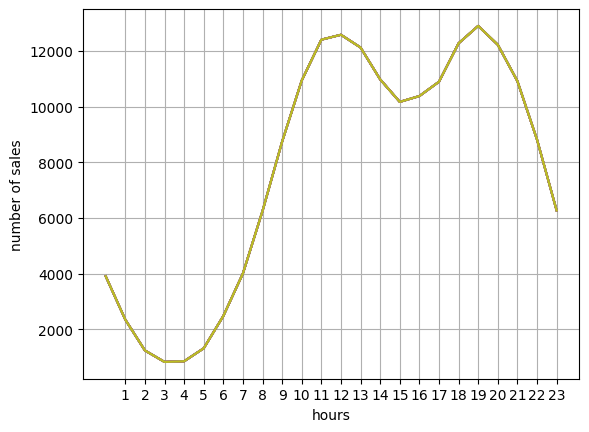

In [249]:
data_per_hour = all_data.groupby('Hour').count()
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,data_per_hour)
plt.xticks(range(1,24))
plt.xlabel("hours")
plt.ylabel("number of sales")
plt.grid()
plt.show()

In [312]:
df_order = all_data.sort_values(['Order ID', 'Product'], ascending=[True, True])
df_order.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2.99,San Francisco (CA),20
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,389.99,Los Angeles (CA),12
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,11.95,San Francisco (CA),12
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,99.99,Los Angeles (CA),10
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,150.00,San Francisco (CA),21


In [313]:
df_order['Cart'] = df_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_order = df_order[['Order ID','Cart']].drop_duplicates()

df_order.head()


,Order ID,Cart
0,141234,iPhone
1,141235,Lightning Charging Cable
2,141236,Wired Headphones
3,141237,27in FHD Monitor
4,141238,Wired Headphones


In [321]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_order['Cart']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,1)))

count.most_common(10)

[(('USB-C Charging Cable',), 21903),
 (('Lightning Charging Cable',), 21658),
 (('AAA Batteries (4-pack)',), 20641),
 (('AA Batteries (4-pack)',), 20577),
 (('Wired Headphones',), 18882),
 (('Apple Airpods Headphones',), 15549),
 (('Bose SoundSport Headphones',), 13325),
 (('27in FHD Monitor',), 7507),
 (('iPhone',), 6842),
 (('27in 4K Gaming Monitor',), 6230)]

In [332]:
products = all_data.groupby('Product')
quantity_ordered = products['Quantity Ordered'].sum()
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64